In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier

Dataset digits que contiene un dataset de numeros en bits

In [5]:
# Dataset incorporado en la libreria
digits = datasets.load_digits()


Atributos de digits

In [6]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

Digito cero representado en un array

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

graficando el array del digito cero

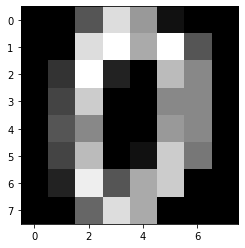

In [8]:
plt.gray() 
plt.imshow(digits.images[0])
plt.show()

In [9]:
digits.images.shape

(1797, 8, 8)

In [10]:
digits.target[:]

array([0, 1, 2, ..., 8, 9, 8])

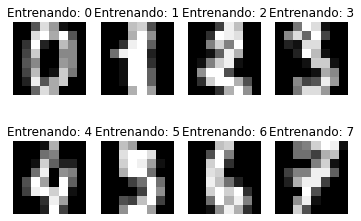

In [18]:

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image,interpolation='nearest')
    plt.title('Entrenando: %i' % label)



In [12]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#Entrenando con el algoritmo random forest

In [13]:
# Creando el clasificador
classifier = RandomForestClassifier(n_estimators=30, criterion='entropy')

# Aprendemos los dígitos de la primera mitad de los dígitos.
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
# Ahora predecimos el valor del dígito en la segunda mitad:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])


In [15]:
#tiene un score de 91%
classifier.score(data[n_samples // 2:], expected)

0.9165739710789766

In [16]:
#matriz de confusion
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 75  2  3  0  1  0  0  1  9]
 [ 1  0 78  6  0  0  0  0  0  1]
 [ 0  1  0 80  0  2  0  1  7  0]
 [ 1  0  0  0 85  1  0  1  0  4]
 [ 0  1  0  0  0 82  2  0  0  6]
 [ 0  0  0  0  0  0 90  0  1  0]
 [ 0  0  1  0  0  0  0 88  0  0]
 [ 0  3  1  3  1  2  0  2 74  2]
 [ 1  0  0  1  0  2  0  1  2 85]]


#Prediccion de el algoritmo random forest

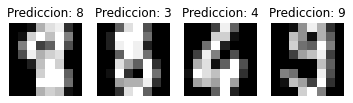

In [19]:

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image)
    plt.title('Prediccion: %i' % prediction)

plt.show()